In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read Sparkling.csv dataset
sparkling_data = pd.read_csv('Sparkling.csv')

from statsmodels.tsa.seasonal import seasonal_decompose




In [2]:
sparkling_data.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [3]:
sparkling_data.dtypes

YearMonth    object
Sparkling     int64
dtype: object

In [4]:
# Import necessary libraries
import pandas as pd


sparkling_data = pd.read_csv('Sparkling.csv')

# Convert 'YearMonth' to datetime64
sparkling_data['YearMonth'] = pd.to_datetime(sparkling_data['YearMonth'], format='%Y-%m')

# Print the head to verify the changes
print(sparkling_data.head())


   YearMonth  Sparkling
0 1980-01-01       1686
1 1980-02-01       1591
2 1980-03-01       2304
3 1980-04-01       1712
4 1980-05-01       1471


In [5]:
sparkling_data.dtypes

YearMonth    datetime64[ns]
Sparkling             int64
dtype: object

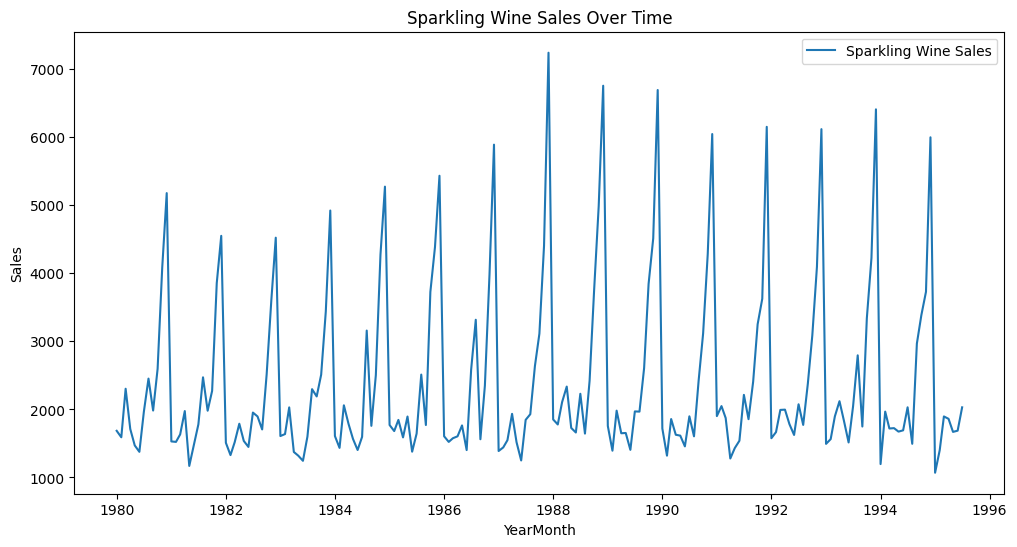

In [6]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(sparkling_data['YearMonth'], sparkling_data['Sparkling'], label='Sparkling Wine Sales')
plt.title('Sparkling Wine Sales Over Time')
plt.xlabel('YearMonth')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [44]:
# Check for missing values
print("Missing values before imputation:")
print(sparkling_data.isnull().sum())

Missing values before imputation:
Sparkling    0
dtype: int64


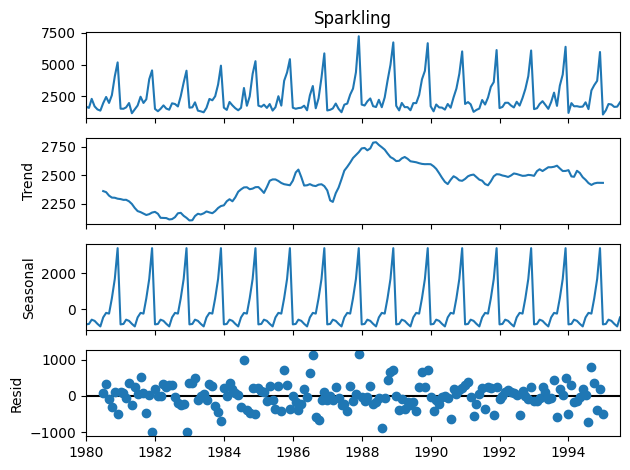

In [45]:
# Decompose the time series data (Additive Decomposition)
decomposition_add_sparkling = seasonal_decompose(sparkling_data['Sparkling'], model='additive', period=12)
decomposition_add_sparkling.plot()
plt.show()

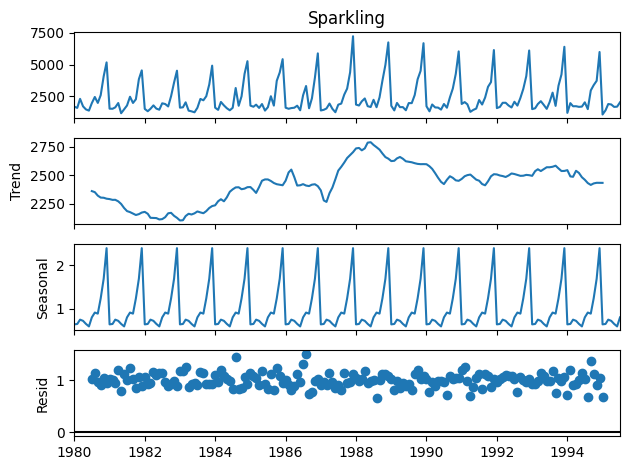

In [46]:
# Decompose the time series data (Multiplicative Decomposition)
decomposition_mul_sparkling = seasonal_decompose(sparkling_data['Sparkling'], model='multiplicative', period=12)
decomposition_mul_sparkling.plot()
plt.show()

In [9]:

# Read Sparkling.csv dataset
sparkling_data = pd.read_csv('Sparkling.csv')
sparkling_data['YearMonth'] = pd.to_datetime(sparkling_data['YearMonth'], format='%Y-%m')
sparkling_data = sparkling_data.set_index('YearMonth')

# Split the data into training and test sets
# Test data should start in 1991
train_sparkling = sparkling_data[sparkling_data.index < '1991-01-01']
test_sparkling = sparkling_data[sparkling_data.index >= '1991-01-01']

# Check the shapes of the training and test sets
print("Training Sparkling Data Shape:", train_sparkling.shape)
print("Test Sparkling Data Shape:", test_sparkling.shape)


Training Sparkling Data Shape: (132, 1)
Test Sparkling Data Shape: (55, 1)


SES RMSE for Sparkling: 1304.9274045289721


/Users/issac/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


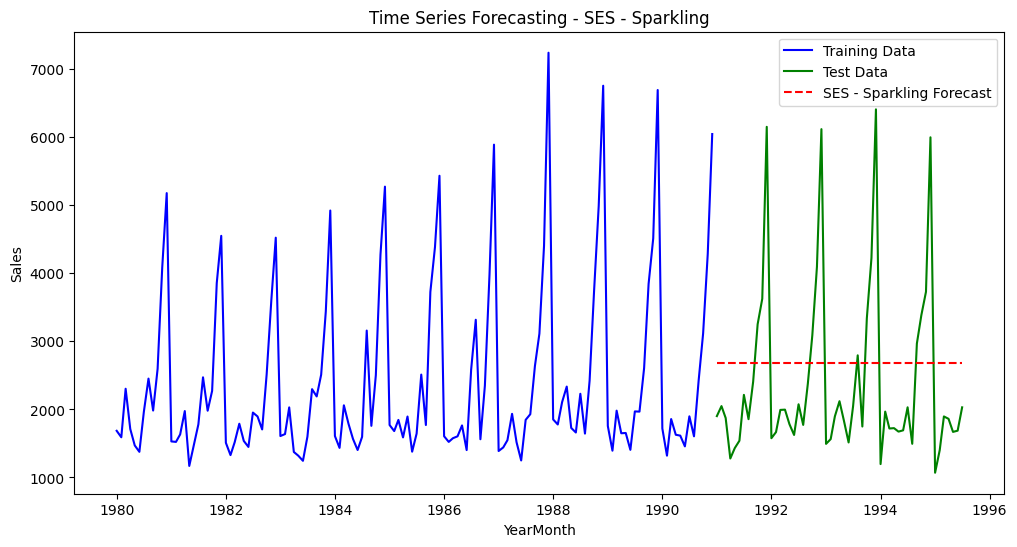

In [10]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to plot time series data and forecasts
def plot_forecast(train_data, test_data, forecast, model_name):
    plt.figure(figsize=(12, 6))

    # Plot training data
    plt.plot(train_data.index, train_data['Sparkling'], label='Training Data', color='blue')

    # Plot test data
    plt.plot(test_data.index, test_data['Sparkling'], label='Test Data', color='green')

    # Plot forecast
    plt.plot(test_data.index, forecast, label=f'{model_name} Forecast', linestyle='dashed', color='red')

    plt.title(f'Time Series Forecasting - {model_name}')
    plt.xlabel('YearMonth')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

# Fit SES model
ses_model_sparkling = SimpleExpSmoothing(train_sparkling['Sparkling']).fit()

# Forecast on test data
ses_forecast_sparkling = ses_model_sparkling.forecast(len(test_sparkling))

# Calculate RMSE
ses_rmse_sparkling = mean_squared_error(test_sparkling['Sparkling'], ses_forecast_sparkling, squared=False)
print("SES RMSE for Sparkling:", ses_rmse_sparkling)

# Plotting SES results
plot_forecast(train_sparkling, test_sparkling, ses_forecast_sparkling, 'SES - Sparkling')


Holt RMSE for Sparkling: 5291.879833226914


/Users/issac/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/issac/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


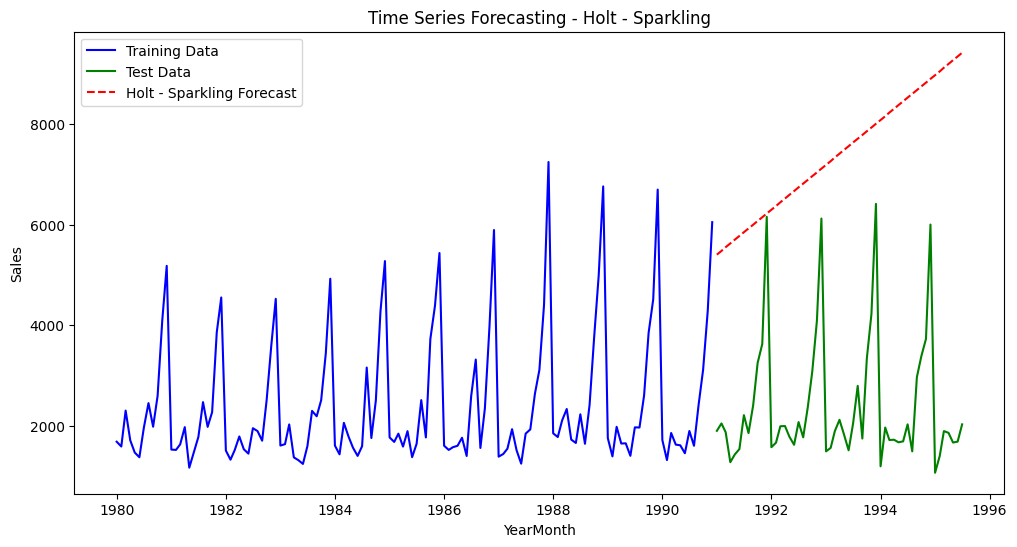

In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt model
holt_model_sparkling = ExponentialSmoothing(train_sparkling['Sparkling'], trend='add').fit()

# Forecast on test data
holt_forecast_sparkling = holt_model_sparkling.forecast(len(test_sparkling))

# Calculate RMSE
holt_rmse_sparkling = mean_squared_error(test_sparkling['Sparkling'], holt_forecast_sparkling, squared=False)
print("Holt RMSE for Sparkling:", holt_rmse_sparkling)

# Plotting Holt results
plot_forecast(train_sparkling, test_sparkling, holt_forecast_sparkling, 'Holt - Sparkling')


Holt-Winters (Additive) RMSE for Sparkling: 378.95206466259117


/Users/issac/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


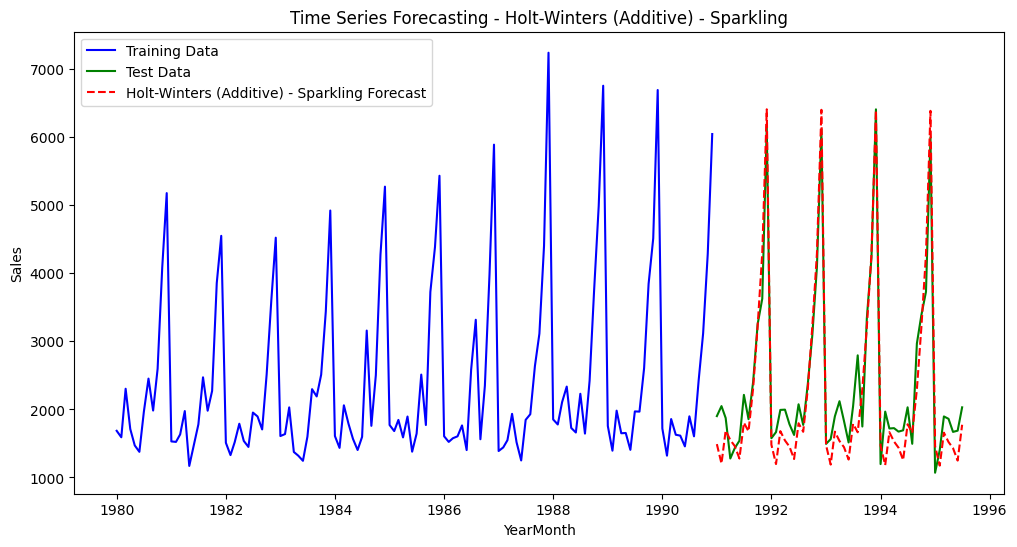

In [12]:
# Fit Holt-Winters model (additive seasonal)
hw_add_model_sparkling = ExponentialSmoothing(train_sparkling['Sparkling'], trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast on test data
hw_add_forecast_sparkling = hw_add_model_sparkling.forecast(len(test_sparkling))

# Calculate RMSE
hw_add_rmse_sparkling = mean_squared_error(test_sparkling['Sparkling'], hw_add_forecast_sparkling, squared=False)
print("Holt-Winters (Additive) RMSE for Sparkling:", hw_add_rmse_sparkling)

# Plotting Holt-Winters (Additive) results
plot_forecast(train_sparkling, test_sparkling, hw_add_forecast_sparkling, 'Holt-Winters (Additive) - Sparkling')


Holt-Winters (Multiplicative) RMSE for Sparkling: 403.4060954817557


/Users/issac/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


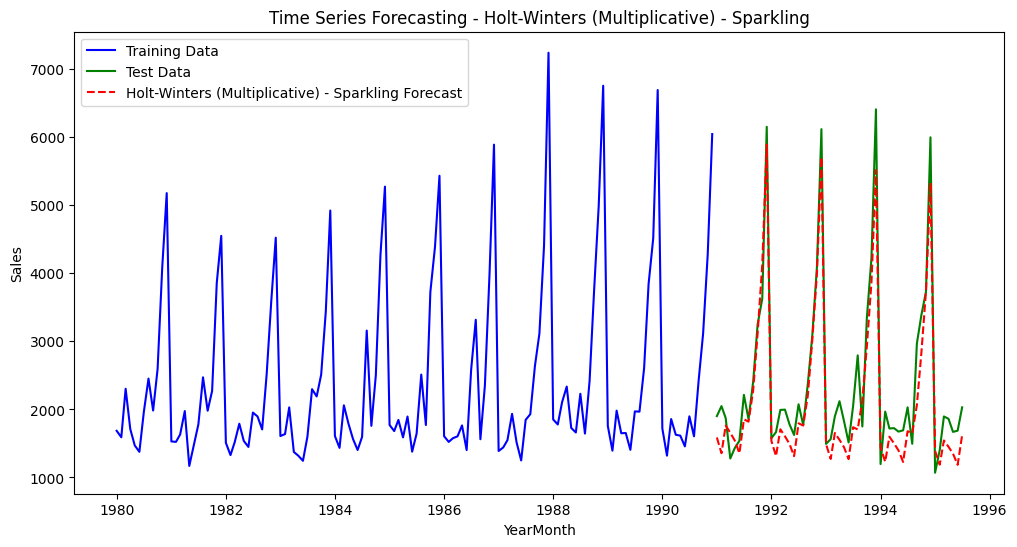

In [13]:
# Fit Holt-Winters model (multiplicative seasonal)
hw_mul_model_sparkling = ExponentialSmoothing(train_sparkling['Sparkling'], trend='add', seasonal='mul', seasonal_periods=12).fit()

# Forecast on test data
hw_mul_forecast_sparkling = hw_mul_model_sparkling.forecast(len(test_sparkling))

# Calculate RMSE
hw_mul_rmse_sparkling = mean_squared_error(test_sparkling['Sparkling'], hw_mul_forecast_sparkling, squared=False)
print("Holt-Winters (Multiplicative) RMSE for Sparkling:", hw_mul_rmse_sparkling)

# Plotting Holt-Winters (Multiplicative) results
plot_forecast(train_sparkling, test_sparkling, hw_mul_forecast_sparkling, 'Holt-Winters (Multiplicative) - Sparkling')


Naive Forecast RMSE for Sparkling: 3864.2793518443914


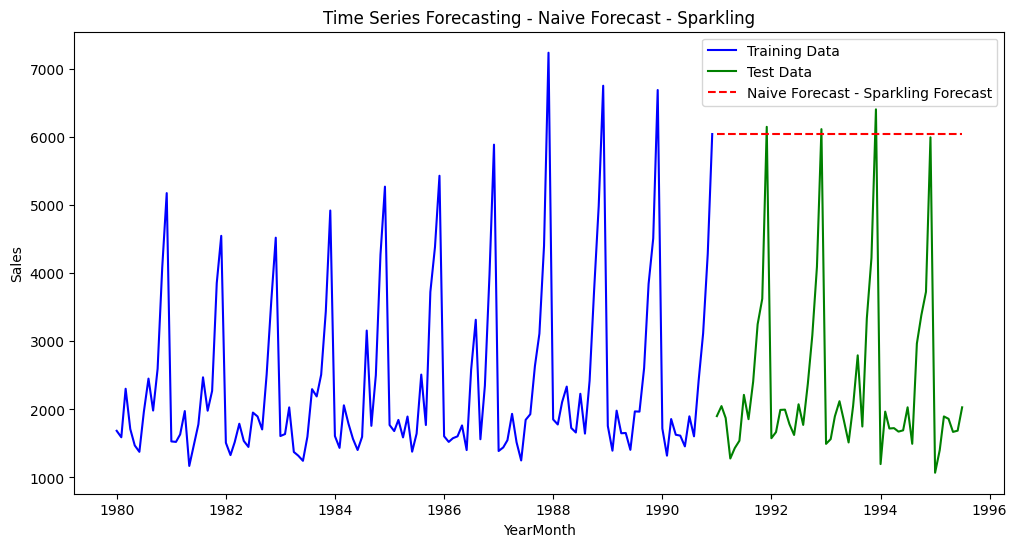

In [14]:
# Forecast using naive method (last observed value)
naive_forecast_sparkling = train_sparkling['Sparkling'].iloc[-1]

# Repeat the naive forecast for the length of the test data
naive_forecast_sparkling = pd.Series([naive_forecast_sparkling] * len(test_sparkling), index=test_sparkling.index)

# Calculate RMSE
naive_rmse_sparkling = mean_squared_error(test_sparkling['Sparkling'], naive_forecast_sparkling, squared=False)
print("Naive Forecast RMSE for Sparkling:", naive_rmse_sparkling)

# Plotting Naive Forecast results
plot_forecast(train_sparkling, test_sparkling, naive_forecast_sparkling, 'Naive Forecast - Sparkling')


Simple Average Forecast RMSE for Sparkling: 1275.0818036965309


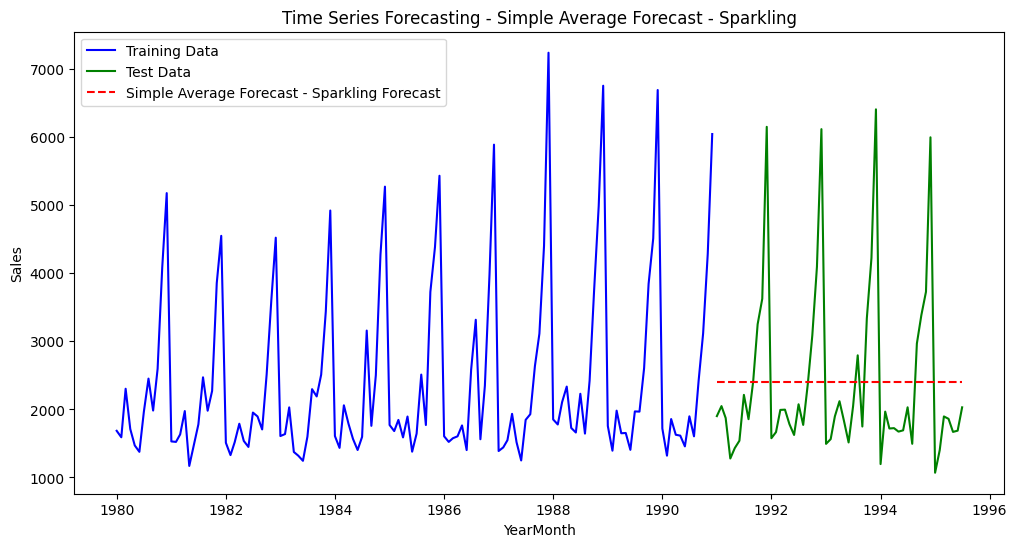

In [15]:
# Forecast using simple average (mean of training data)
average_forecast_sparkling = pd.Series([train_sparkling['Sparkling'].mean()] * len(test_sparkling), index=test_sparkling.index)

# Calculate RMSE
average_rmse_sparkling = mean_squared_error(test_sparkling['Sparkling'], average_forecast_sparkling, squared=False)
print("Simple Average Forecast RMSE for Sparkling:", average_rmse_sparkling)

# Plotting Simple Average Forecast results
plot_forecast(train_sparkling, test_sparkling, average_forecast_sparkling, 'Simple Average Forecast - Sparkling')


Linear Regression RMSE for Sparkling: 1389.2490472992972


/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_47205/2266144887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sparkling['Ordinal'] = train_sparkling.index.to_series().apply(lambda x: x.toordinal())
/var/folders/g6/r6n9dbvn4pq47jbsfzvh8qsm0000gn/T/ipykernel_47205/2266144887.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_sparkling['Ordinal'] = test_sparkling.index.to_series().apply(lambda x: x.toordinal())
/Users/issac/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.p

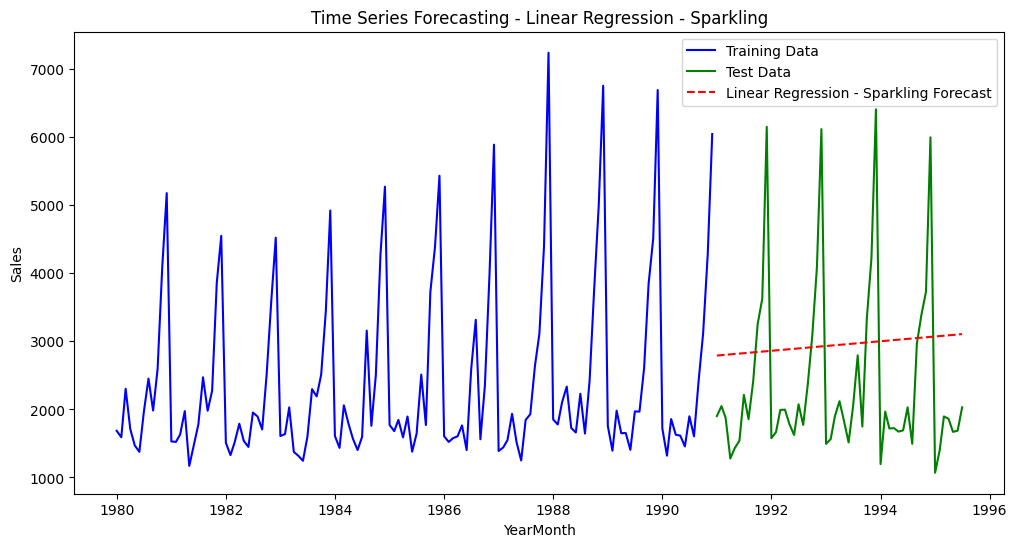

In [16]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert datetime64 to ordinal for linear regression input
train_sparkling['Ordinal'] = train_sparkling.index.to_series().apply(lambda x: x.toordinal())
test_sparkling['Ordinal'] = test_sparkling.index.to_series().apply(lambda x: x.toordinal())

# Fit Linear Regression model
lr_model_sparkling = LinearRegression().fit(train_sparkling[['Ordinal']], train_sparkling['Sparkling'])

# Forecast on test data
test_ordinal = test_sparkling.index.to_series().apply(lambda x: x.toordinal())
lr_forecast_sparkling = lr_model_sparkling.predict(test_ordinal.values.reshape(-1, 1))

# Calculate RMSE
lr_rmse_sparkling = mean_squared_error(test_sparkling['Sparkling'], lr_forecast_sparkling, squared=False)
print("Linear Regression RMSE for Sparkling:", lr_rmse_sparkling)

# Plotting Linear Regression results
plot_forecast(train_sparkling, test_sparkling, lr_forecast_sparkling, 'Linear Regression - Sparkling')


In [17]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test
def adf_test(series, name=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Test Results for {name}:')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    print('Is the time series stationary?', 'No (reject null hypothesis)' if result[1] < 0.05 else 'Yes (fail to reject null hypothesis)')
    print()

# Perform ADF test on original data
adf_test(train_sparkling['Sparkling'], name='Original Data')

diff_train_sparkling = train_sparkling['Sparkling'].diff().dropna()

# Perform ADF test on differenced data
adf_test(diff_train_sparkling, name='Differenced Data')



ADF Test Results for Original Data:
ADF Statistic: -1.2089255549356304
p-value: 0.6697444263523339
Critical Values: {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}
Is the time series stationary? Yes (fail to reject null hypothesis)

ADF Test Results for Differenced Data:
ADF Statistic: -8.00500723642203
p-value: 2.2801043558263416e-12
Critical Values: {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}
Is the time series stationary? No (reject null hypothesis)



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=1781.083, Time=0.91 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1802.591, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1785.414, Time=0.25 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1778.358, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1800.605, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1797.959, Time=0.08 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=1779.826, Time=0.42 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=1779.771, Time=0.93 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1785.188, Time=0.33 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=1782.019, Time=1.41 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1780.549, Time=0.23 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1779.603, Time=0.49 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=1780.339, Time=0.25 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1778.494, Time=0.26 sec
 ARIMA(1,0,2)(0,1,1

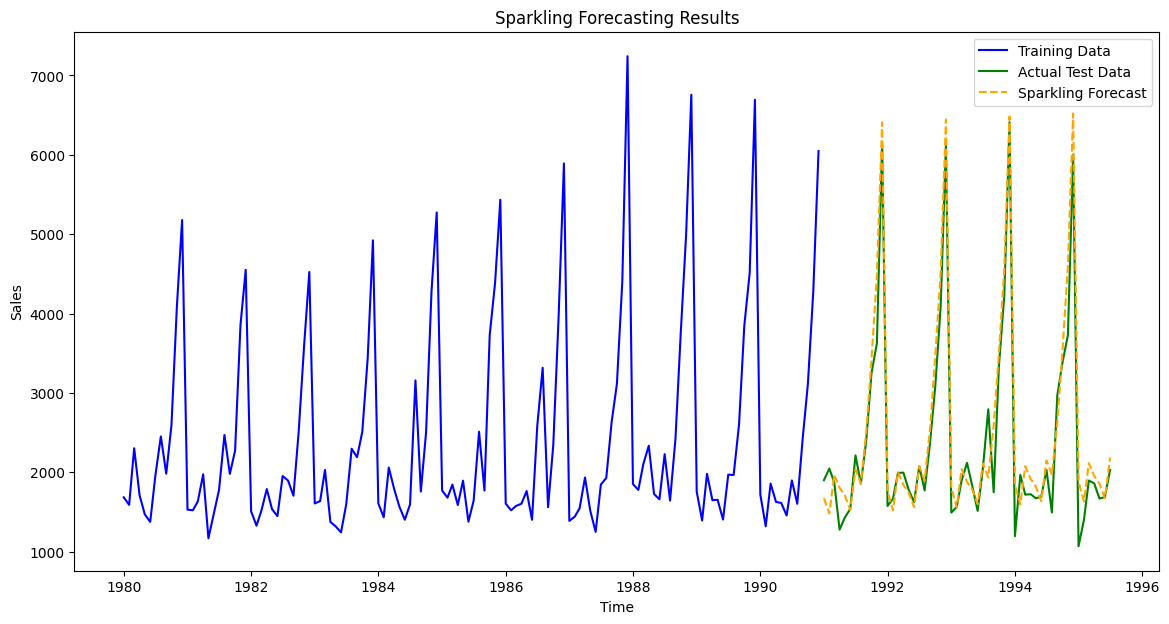

In [37]:
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Function to evaluate ARIMA model on test data and plot the forecast
def evaluate_arima_model(train_data, test_data, order, model_name):
    # Fit ARIMA model
    model = auto_arima(train_data, start_p=1, start_q=1, max_p=5, max_q=5, m=12, seasonal=True, d=None, D=None, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
    print(f"Selected ARIMA Order for {model_name}:", model.order)

    # Forecast on test data
    arima_forecast, conf_int = model.predict(n_periods=len(test_data), return_conf_int=True)
    
    # Calculate RMSE
    arima_rmse = np.sqrt(mean_squared_error(test_data, arima_forecast))
    print(f"ARIMA RMSE for {model_name}:", arima_rmse)

    # Plotting ARIMA results
    plt.figure(figsize=(14, 7))
    plt.plot(train_data, label='Training Data', color='blue')
    plt.plot(test_data, label='Actual Test Data', color='green')
    plt.plot(arima_forecast, label=f'{model_name} Forecast', linestyle='dashed', color='orange')
    plt.title(f'{model_name} Forecasting Results')
    plt.xlabel('Time')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()


evaluate_arima_model(train_sparkling['Sparkling'], test_sparkling['Sparkling'], order=None, model_name='Sparkling')


In [39]:
 arima_rmse

NameError: name 'arima_rmse' is not defined

In [40]:
import pandas as pd

# Initialize an empty list to collect results for Sparkling
sparkling_results = []

# Function to add model results to the list for Sparkling
def add_sparkling_result(model_name, parameters, rmse):
    sparkling_results.append({'Model': model_name, 'Parameters': parameters, 'RMSE': rmse})

# Example - Add results for each model for Sparkling dataset
add_sparkling_result('SES', 'Exponential Smoothing (Simple)', ses_rmse_sparkling)
add_sparkling_result('Holt', 'Exponential Smoothing (Double)', holt_rmse_sparkling)
add_sparkling_result('Holt-Winters Additive', 'Additive Seasonal, Trend, Error', hw_add_rmse_sparkling)
add_sparkling_result('Holt-Winters Multiplicative', 'Multiplicative Seasonal, Trend, Error', hw_mul_rmse_sparkling)
add_sparkling_result('Naive', 'Naive Forecast', naive_rmse_sparkling)
add_sparkling_result('Simple Average', 'Simple Average Forecast', average_rmse_sparkling)
add_sparkling_result('Linear Regression', 'Linear Regression Forecast', lr_rmse_sparkling)
# Add ARIMA result for Sparkling manually
add_sparkling_result('ARIMA', 'Manual ARIMA', 355.93094265265796)



# Convert the list to a DataFrame for Sparkling
sparkling_results_df = pd.DataFrame(sparkling_results)

# Display the DataFrame for Sparkling
print("Model Results for Sparkling Dataset:")
sparkling_results_df


Model Results for Sparkling Dataset:


,Model,Parameters,RMSE
0,SES,Exponential Smoothing (Simple),1304.927405
1,Holt,Exponential Smoothing (Double),5291.879833
2,Holt-Winters Additive,"Additive Seasonal, Trend, Error",378.952065
3,Holt-Winters Multiplicative,"Multiplicative Seasonal, Trend, Error",403.406095
4,Naive,Naive Forecast,3864.279352
5,Simple Average,Simple Average Forecast,1275.081804
6,Linear Regression,Linear Regression Forecast,1389.249047
7,ARIMA,Manual ARIMA,355.930943


/Users/issac/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/issac/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/issac/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/issac/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


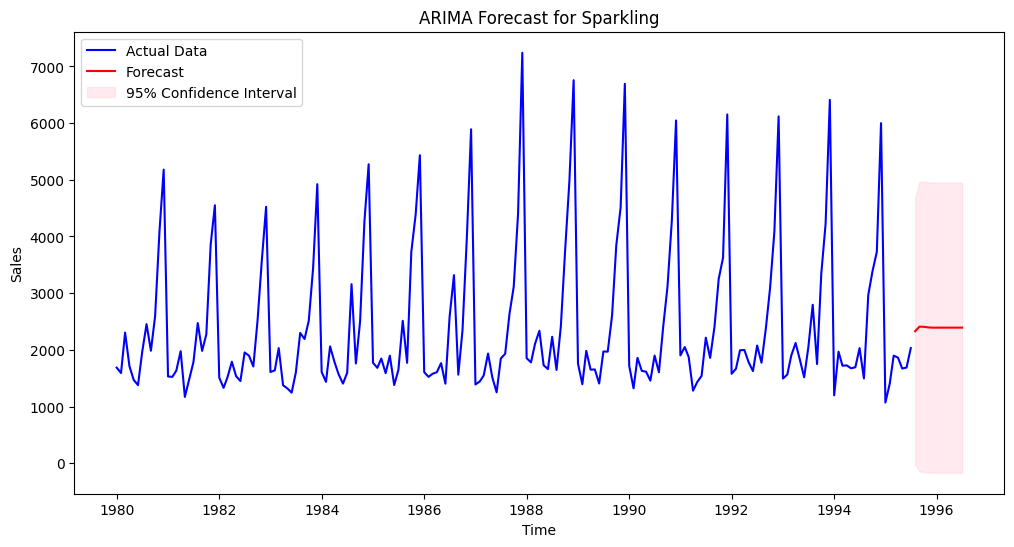

In [43]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

sparkling_data = pd.read_csv('Sparkling.csv')
sparkling_data['YearMonth'] = pd.to_datetime(sparkling_data['YearMonth'], format='%Y-%m')
sparkling_data = sparkling_data.set_index('YearMonth')

# Fit the ARIMA model on the complete data
optimal_order = (2, 1, 1)  
optimal_arima_model = ARIMA(sparkling_data['Sparkling'], order=optimal_order).fit()

# Forecast 12 months into the future
forecast_steps = 12
forecast = optimal_arima_model.get_forecast(steps=forecast_steps, alpha=0.05)

# Extracting forecast values
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the forecast with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(sparkling_data.index, sparkling_data['Sparkling'], label='Actual Data', color='blue')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='red')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('ARIMA Forecast for Sparkling')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()
